### Statistics of the dataset at depth 1
This notebook contains statistics and plots of the dataset at depth 1 (16 classes)

In [7]:
from __future__ import absolute_import, division, print_function, unicode_literals

#! pip install tensorflow
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.utils import shuffle

AUTOTUNE = tf.data.experimental.AUTOTUNE
import IPython.display as display


import os
from os import listdir
from os.path import isfile, join
import pickle
import random
#importing module
from datahandler_multilabel import create_dataset

from PIL import ImageFile, Image

with open('filenames.pkl', 'rb') as infile:
    filenames = pickle.load(infile)
    
with open('labels.pkl', 'rb') as infile2:
    labels = pickle.load(infile2)
    
with open('train_test_split.pkl', 'rb') as infile3:
    train_test_split = pickle.load(infile3)

In [11]:
complete_df = pd.concat([pd.Series(filenames, name='filenames'), pd.Series(labels, name='labels')], axis=1)
print(complete_df.shape, complete_df.columns)

(24999, 2) Index(['filenames', 'labels'], dtype='object')


In [12]:
train_test_val_df = pd.concat([pd.Series(train_test_split[0], name='train_x'), pd.Series(train_test_split[1], name='train_y'),\
                               pd.Series(train_test_split[2], name='val_x'), pd.Series(train_test_split[3], name='val_y'), \
                               pd.Series(train_test_split[3], name='test_x'), pd.Series(train_test_split[5], name='test_y')],\
                              axis=1)
print(train_test_val_df.shape, train_test_val_df.columns)

(18000, 6) Index(['train_x', 'train_y', 'val_x', 'val_y', 'test_x', 'test_y'], dtype='object')


### General Dataset Statistics

In [18]:
labels_df = pd.DataFrame(complete_df['labels'].values.tolist(), index=complete_df['labels'].index)
labels_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24994,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24995,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24996,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24997,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
labels_df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
count,24999.000000,24999.000000,24999.000000,24999.000000,24999.000000,24999.000000,24999.000000,24999.000000,24999.000000,24999.000000,24999.000000,24999.000000,24999.000000,24999.000000,24999.000000,24999.000000
mean,0.578103,0.376735,0.266611,0.326373,0.289012,0.294852,0.485499,0.244050,0.070963,0.161886,0.094404,0.079923,0.088724,0.048202,0.078403,0.000040
std,0.493872,0.484577,0.442196,0.468895,0.453312,0.455985,0.499800,0.429531,0.256768,0.368354,0.292395,0.271180,0.284350,0.214197,0.268810,0.006325
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


C:\Users\Ludovica\Anaconda3\envs\tf\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Ludovica\Anaconda3\envs\tf\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Ludovica\Anaconda3\envs\tf\lib\site-packages\pandas\plotting\_matplotlib\tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\Ludovica\Anaconda3\envs

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018FFFBAB348>,
      dtype=object)

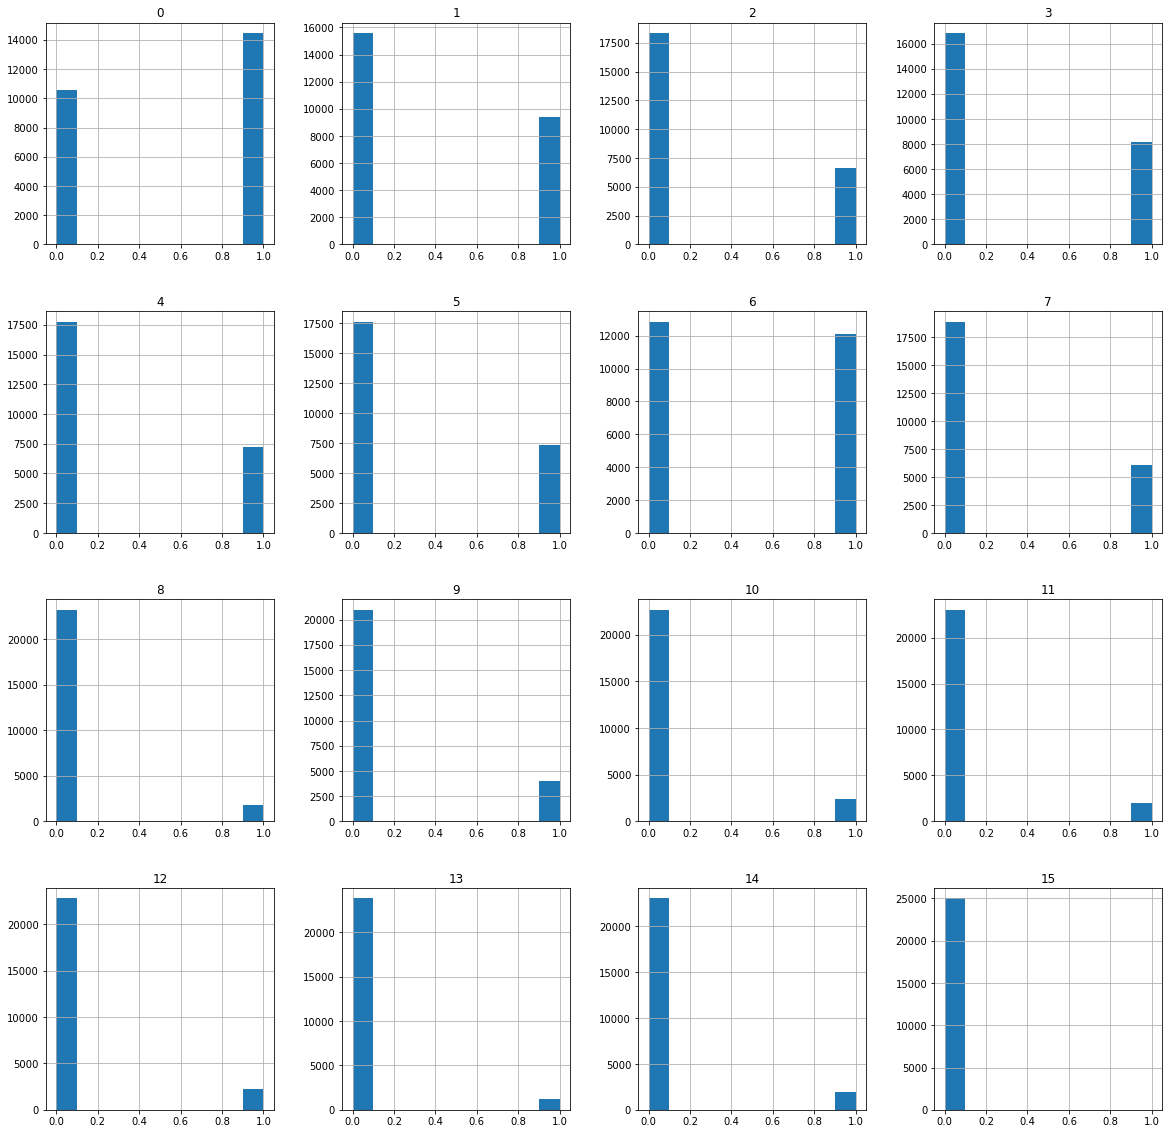

In [26]:
labels_df.hist(figsize=(20,20))

In [28]:
from pandas.plotting import scatter_matrix
#scatter_matrix(labels_df, alpha=0.2, figsize=(20, 20), diagonal='kde')

In [ ]:
class_overlap = [0]*len(labels_df.columns)
for i in range(len(labels_df.columns)):
    class_overlap[i] = [0]*len(labels_df.columns)
    for j in range(len(labels_df.columns)):
        class_overlap[i][j] = 0
        for index in range(labels_df.shape[0]):
            if labels_df[i][index] == labels_df[j][index]:
                if labels_df[i][index] == 1:
                    class_overlap[i][j] += 1

len(class_overlap)

In [40]:
class_overlap[0][1], class_overlap[1][0]

(7160, 7160)

### Distribution of train validation and test

In [48]:
train_df = pd.DataFrame(train_test_val_df['train_y'].values.tolist(), index=train_test_val_df['train_y'].index)
val_df = pd.DataFrame(train_test_val_df['val_y'][:3000].values.tolist(), index=train_test_val_df['val_y'].index[:3000])
test_df = pd.DataFrame(train_test_val_df['test_y'][:3999].values.tolist(), index=train_test_val_df['test_y'].index[:3999])

In [55]:
train_df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
count,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000
mean,0.581500,0.377167,0.265222,0.324944,0.289889,0.294556,0.484056,0.244556,0.070056,0.161778,0.093944,0.079778,0.089056,0.047111,0.080056,0.000056
std,0.493327,0.484691,0.441464,0.468367,0.453723,0.455855,0.499760,0.429835,0.255248,0.368257,0.291760,0.270956,0.284832,0.211882,0.271387,0.007454
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [54]:
val_df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.0
mean,0.577333,0.375667,0.270667,0.325667,0.284667,0.287667,0.468667,0.230000,0.078333,0.161000,0.09600,0.081667,0.088667,0.047667,0.078667,0.0
std,0.494066,0.484375,0.444378,0.468702,0.451331,0.452750,0.499100,0.420903,0.268740,0.367592,0.29464,0.273902,0.284309,0.213095,0.269263,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,0.0


In [56]:
test_df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
count,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.0
mean,0.563391,0.375594,0.269817,0.333333,0.288322,0.301575,0.504626,0.252313,0.069517,0.163041,0.095274,0.079270,0.087272,0.053513,0.070768,0.0
std,0.496027,0.484336,0.443920,0.471463,0.453038,0.458999,0.500041,0.434394,0.254364,0.369449,0.293629,0.270193,0.282268,0.225083,0.256468,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018F97F7EF88>,
      dtype=object)

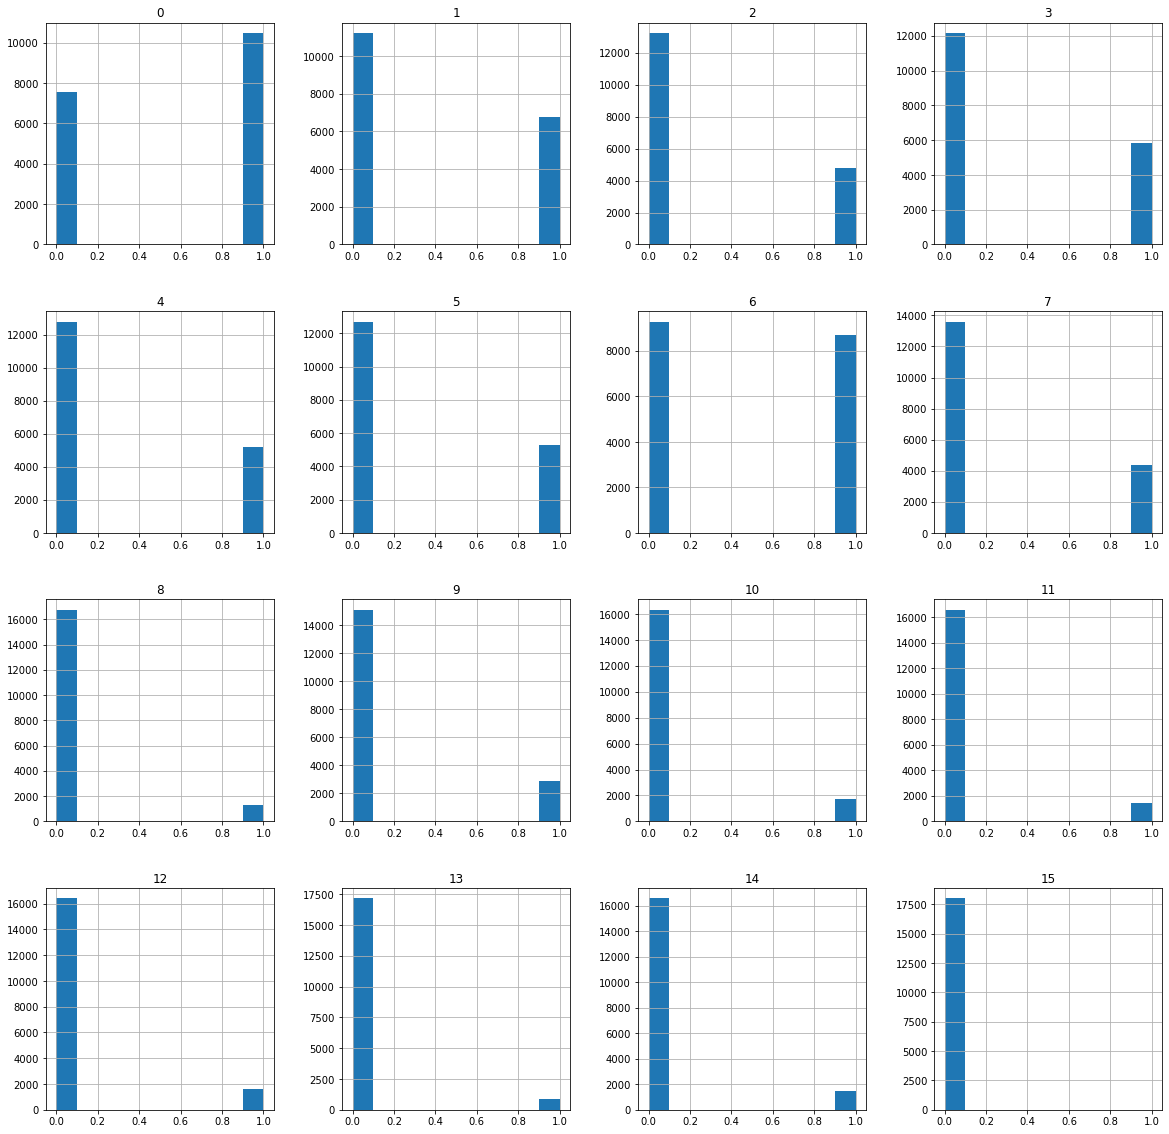

In [62]:
train_df.hist(figsize=(20,20))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018F94822148>,
      dtype=object)

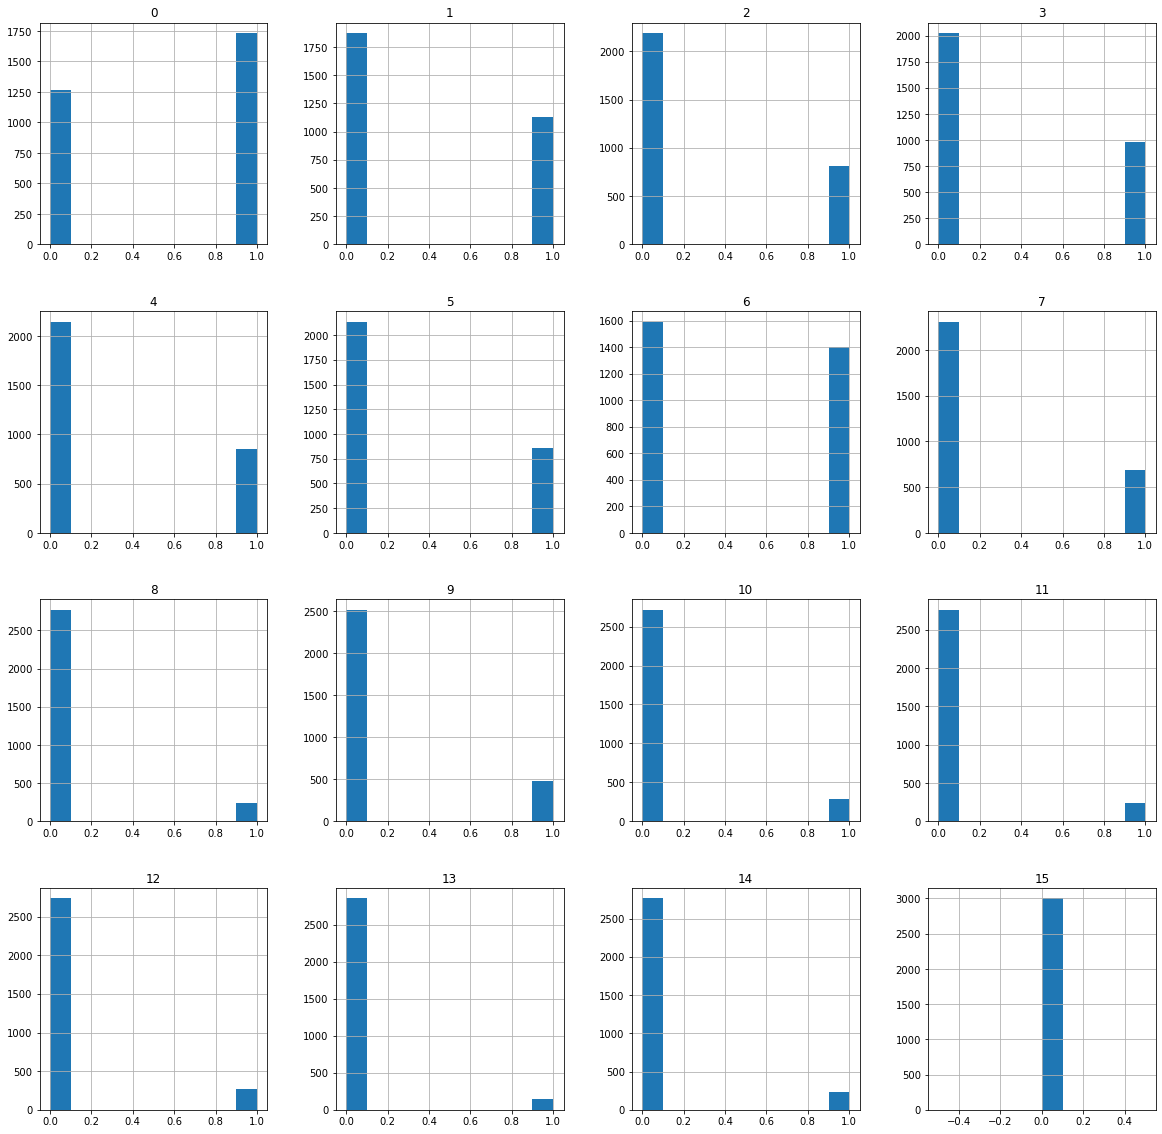

In [59]:
val_df.hist(figsize=(20,20))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018F9512DE48>,
      dtype=object)

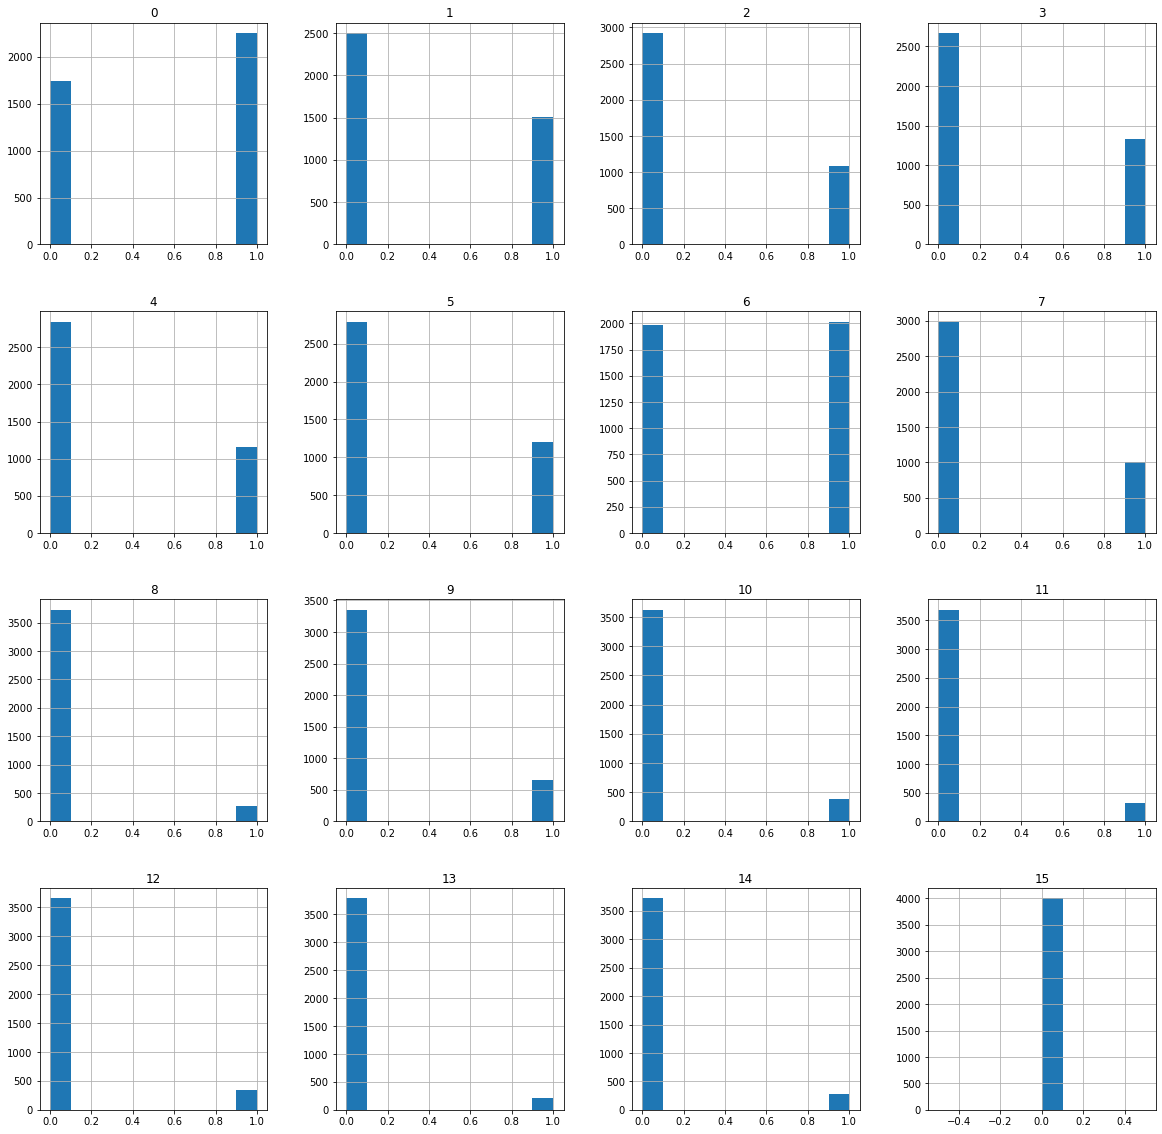

In [60]:
test_df.hist(figsize=(20,20))